###  print out structures

In [1]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn, print_my_params

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, 2, nout], lastReLU=False, weightsinit=2, debug_bw=True
)  # 2-layer neural network
# print("parameters")
# pp.pprint(model.parameters())
# print_my_params(model)
print("layers")
pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(1, 1 + nin))
xinput = [Value(x, type="i%s" % index) for index, x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
# activation.backward()
print("activation", activation)

Module nn MLP: structure
[3, 2, 2, 1]
3
layers
[   Layer of [LinearNeuron(3), LinearNeuron(3)],
    Layer of [LinearNeuron(2), LinearNeuron(2)],
    Layer of [LinearNeuron(2)]]
L1
inputs
[   Value(name=v018,layernumber=,neuronnumber=,weightnumber=,type=i1,data=1, grad=0),
    Value(name=v019,layernumber=,neuronnumber=,weightnumber=,type=i2,data=2, grad=0),
    Value(name=v020,layernumber=,neuronnumber=,weightnumber=,type=i3,data=3, grad=0)]
activation Value(name=v044,layernumber=O,neuronnumber=N1,weightnumber=,type=a,data=12.600000000000003, grad=0)


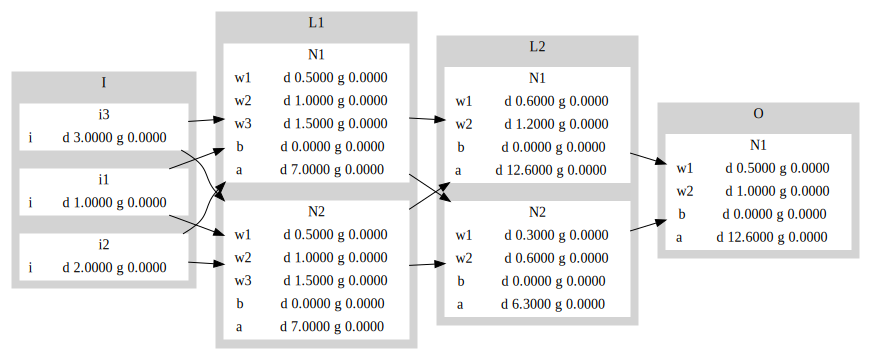

In [3]:
draw_nn(xinput, model)

backward mul   v016   0.00 ->   6.30 v040   0.00 ->   1.00
backward mul   v012   0.00 ->   7.00 v026   0.00 ->   0.30
backward mul   v013   0.00 ->   7.00 v032   0.00 ->   0.60
backward mul   v015   0.00 ->  12.60 v036   0.00 ->   0.50
backward mul   v010   0.00 ->   3.50 v032   0.60 ->   1.20
backward mul   v007   0.00 ->   3.60 v020   0.00 ->   1.80
backward mul   v006   0.00 ->   2.40 v019   0.00 ->   1.20
backward mul   v005   0.00 ->   1.20 v018   0.00 ->   0.60
backward mul   v009   0.00 ->   3.50 v026   0.30 ->   0.60
backward mul   v003   0.00 ->   1.80 v020   1.80 ->   2.70
backward mul   v002   0.00 ->   1.20 v019   1.20 ->   1.80
backward mul   v001   0.00 ->   0.60 v018   0.60 ->   0.90


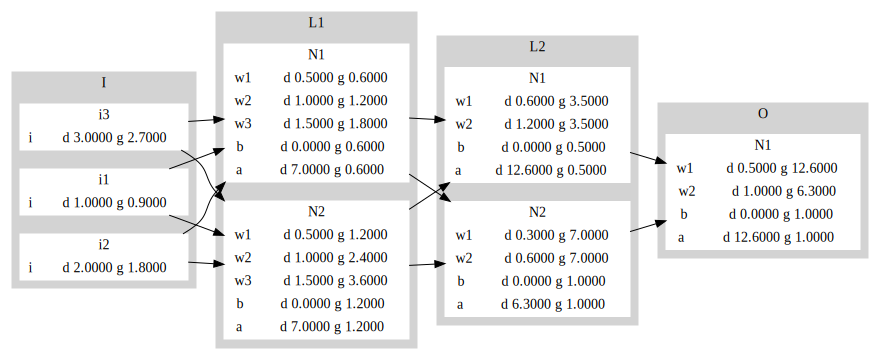

In [4]:
activation.backward()
draw_nn(xinput, model)

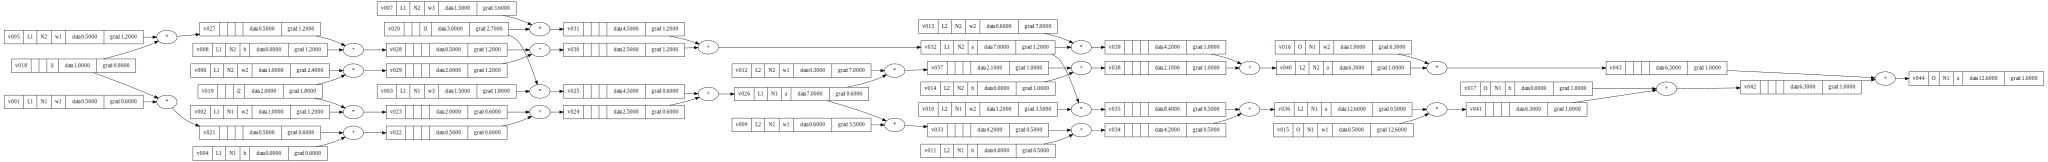

In [5]:
draw_dot(activation)